A machine learning project may not be linear, but it has a number of well known steps:

1. Define Problem.
2. Prepare Data.
3. Evaluate Algorithms.
4. Improve Results.
5. Present Results.

Here is an overview of the proceedure we are going to use:

1. Installing the Python and SciPy platform.
2. Loading the dataset.
3. Summarizing the dataset.
3. Visualizing the dataset.
4. Evaluating some algorithms.
5. Making some predictions.

# **Load Libraties, Data and Explore Data** 📚

**1. Install SciPy Libraries**

There are 5 key libraries that you will need to install. Below is a list of the Python SciPy libraries required for this tutorial:

1. scipy

2. numpy

3. matplotlib

4. pandas

5. sklearn


In [ ]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.19.5
matplotlib: 3.2.2
pandas: 1.1.5
sklearn: 0.22.2.post1


**2. Load The Data**

We are going to use the test data from Microsoft Interview. The dataset contains 748 observations. There are four columns of measurements; the first and third colums are in month, second is in times, while om the third is cc.blood. The fifth column is categorical and tells whether he/she donated blood. 

**2.1 Import libraries**

First, let’s import all of the modules, functions and objects we are going to use in this project.

In [ ]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from numpy import mean
from numpy import std
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
%matplotlib inline

**2.2 Load Dataset**

We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.


In [ ]:
# Load dataset
data = "/content/test_data.csv"
dataset = read_csv(data)

**3. Summarize the Dataset**

In this step we are going to take a look at the data a few different ways:

1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

In [ ]:
dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2.0,50.0,12500.0,98.0,1
1,0.0,13.0,3250.0,28.0,1
2,1.0,16.0,4000.0,35.0,1
3,2.0,20.0,5000.0,45.0,1
4,NaN,24.0,6000.0,77.0,0
...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,0
744,21.0,2.0,500.0,52.0,0
745,23.0,3.0,750.0,62.0,0
746,39.0,1.0,250.0,39.0,0


**3.1 Dimensions of Dataset**

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property.

In [ ]:
...
# shape
print("Shape of the data = ", dataset.shape)

Shape of the data =  (748, 5)


**3.2 Peek at the Data**

It is also always a good idea to actually eyeball your data.

Finding whether we have null values in the data is by using the isnull() function

In [ ]:
...
# info
print("Information about data: \n") 
print("=============================================") 
dataset.info()

Information about data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Recency (months)                            706 non-null    float64
 1   Frequency (times)                           715 non-null    float64
 2   Monetary (c.c. blood)                       707 non-null    float64
 3   Time (months)                               714 non-null    float64
 4   whether he/she donated blood in March 2007  748 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 29.3 KB


In [ ]:
# print total number of null cells
print("Total number of missing value per attribute: \n") 
print("=============================================") 
print(dataset.isnull().sum())

Total number of missing value per attribute: 

Recency (months)                              42
Frequency (times)                             33
Monetary (c.c. blood)                         41
Time (months)                                 34
whether he/she donated blood in March 2007     0
dtype: int64


**3.3 Statistical Summary**

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles.

In [ ]:
...
# descriptions
dataset.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,706.000000,715.000000,707.000000,714.000000,748.000000
mean,9.565156,5.538462,1382.956153,34.295518,0.237968
std,8.184183,5.920303,1479.858696,24.328244,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,3.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


We can see that all of the numerical values have the same scale (centimeters) and similar ranges between 0 and 8 centimeters.

# **Exploratory data analysis** 📚

In [ ]:
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 

**Class Distribution**

Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count.

In [ ]:
...
# class distribution
print(dataset.groupby('whether he/she donated blood in March 2007').size())

whether he/she donated blood in March 2007
0    570
1    178
dtype: int64


Total No. Of peopel that donated blood:  570
Total No. Of people that did not donate blood:  178


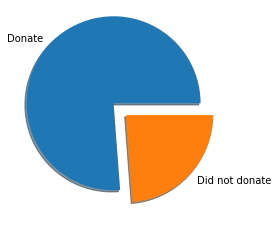

In [ ]:
# seeing the distribution of classes, this will help us to identify which types 

dataset = dataset.rename(columns={'whether he/she donated blood in March 2007': 'donate_or_not'})
donate_blood = len(dataset["donate_or_not"][dataset.donate_or_not == 0])
do_not_donate_blood = len(dataset["donate_or_not"][dataset.donate_or_not == 1])

arr = numpy.array([donate_blood , do_not_donate_blood]) 
labels = ['Donate', 'Did not donate'] 
print("Total No. Of peopel that donated blood: ", donate_blood)
print("Total No. Of people that did not donate blood: ", do_not_donate_blood)

pyplot.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
pyplot.show() 

# inference :- we are actually working on imbalance data  
# imbalance:- your data is not equally distributed between classes 

We can see that each class has the same number of instances (50 or 33% of the dataset). inference is the we are actually working on imbalance data. imbalanc is when the data is not equally distributed between classes 

**4. Data Visualization**

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

Univariate plots to better understand each attribute.
Multivariate plots to better understand the relationships between attributes.

**4.1 Univariate Plots**

We start with some univariate plots, that is, plots of each individual variable.

Given that the input variables are numeric, we can create box and whisker plots of each.

This gives us a much clearer idea of the distribution of the input attributes:

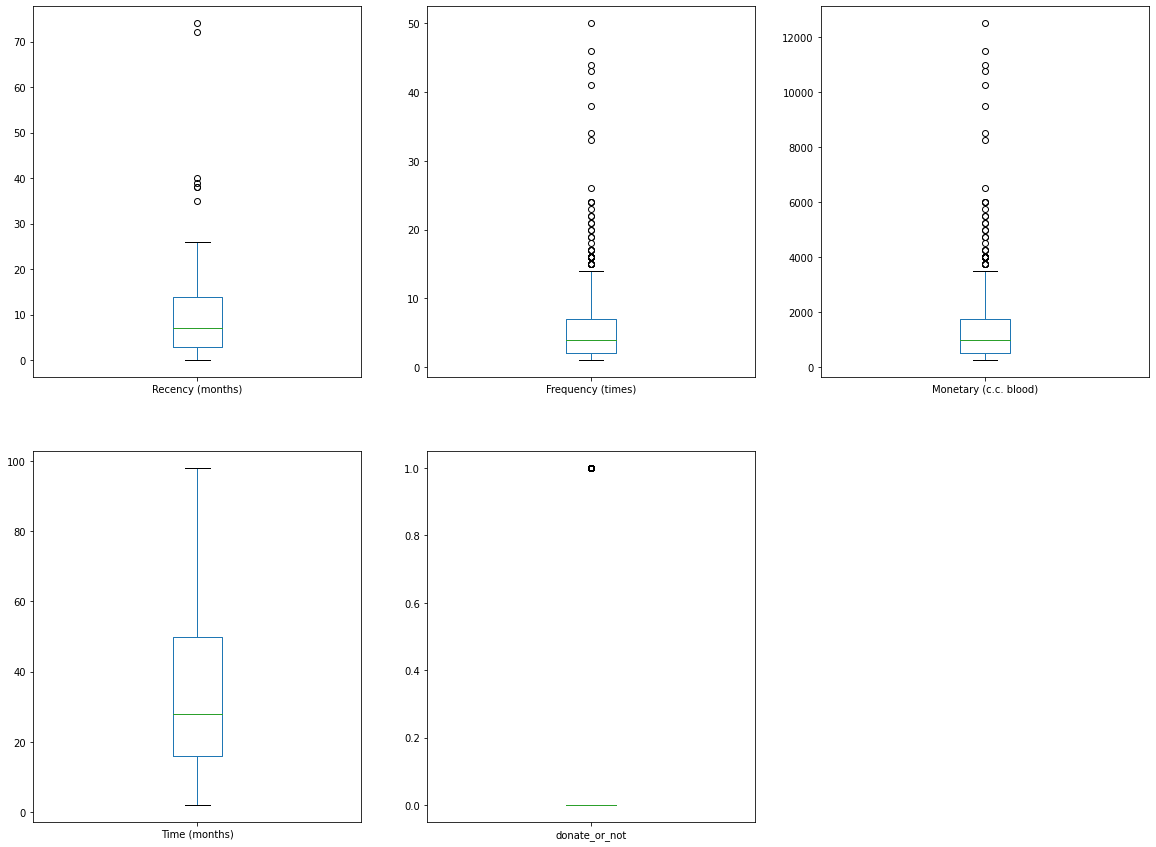

In [ ]:
...
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(20,15))
pyplot.show()

We can also create a histogram of each input variable to get an idea of the distribution.

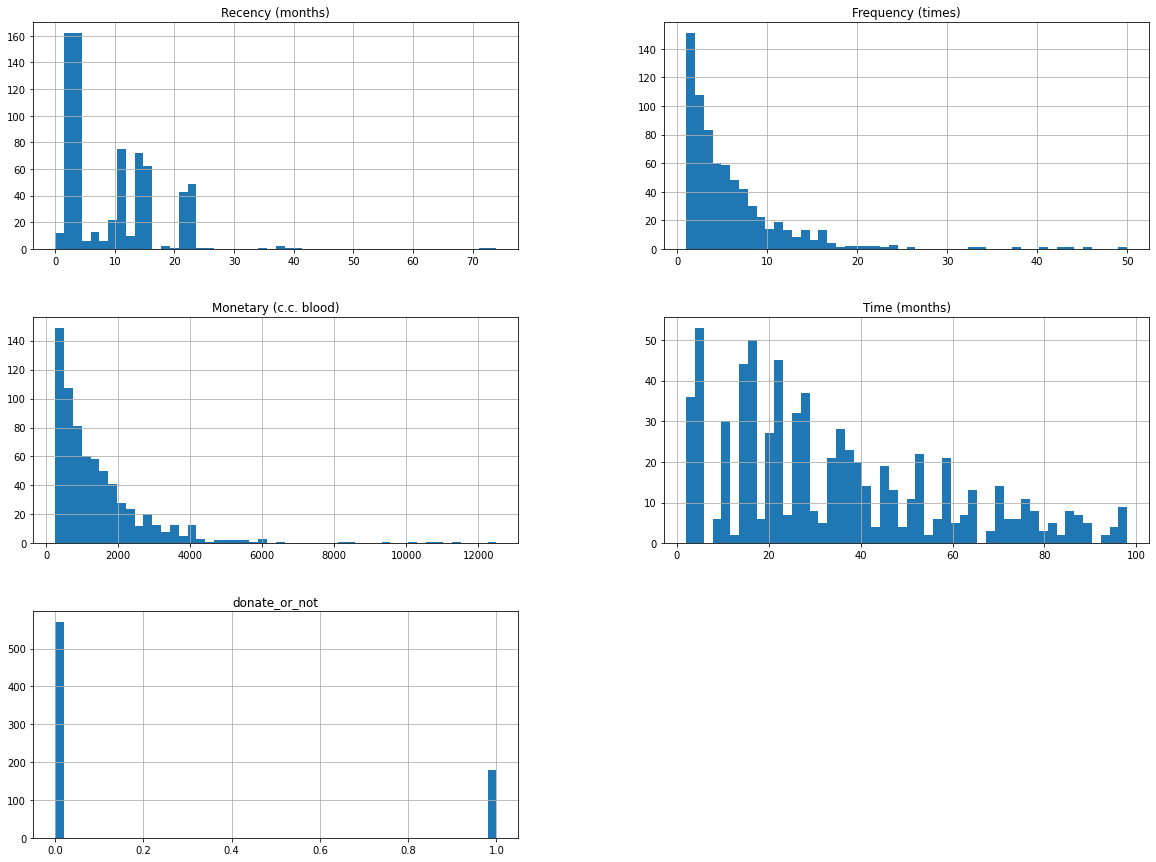

In [ ]:
...
# histograms
dataset.hist(bins = 50, figsize=(20, 15))
pyplot.show()

It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.

**4.2 Multivariate Plots**

Now we can look at the interactions between the variables.

First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

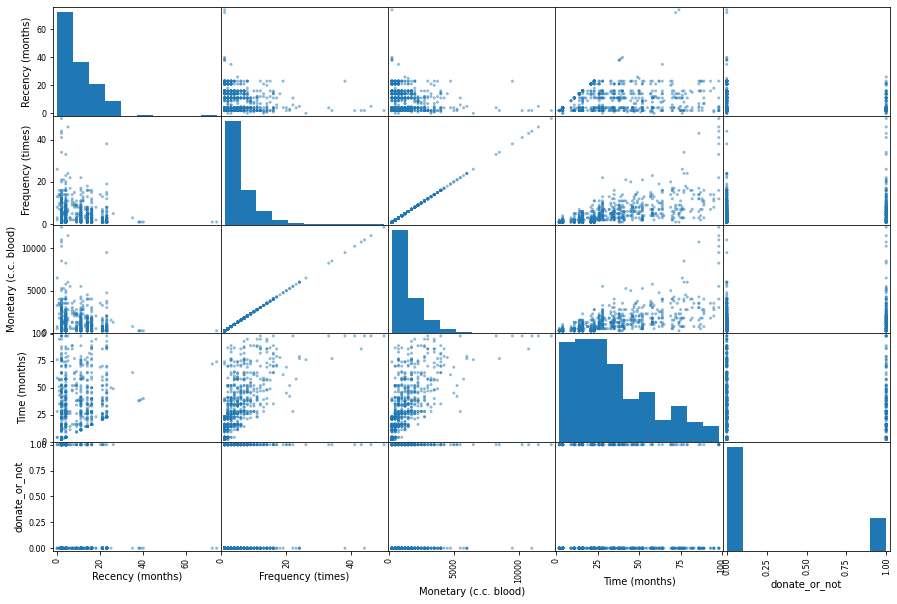

In [ ]:
...
# scatter plot matrix
scatter_matrix(dataset, figsize=(15,10))
pyplot.show()

Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

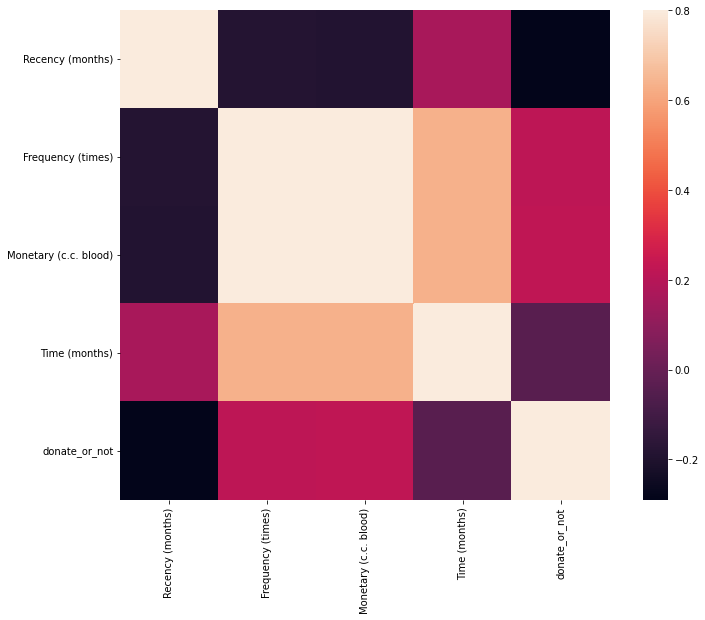

In [ ]:
import seaborn as sns
from matplotlib import gridspec
# Correlation matrix
corrmat = dataset.corr()
fig = pyplot.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
pyplot.show()

# **Dataset development**📚

**Prepare For Modeling by Pre-Processing Data**

There are many techniques that you can use to prepare your data for modeling. For example, try out some of the following

1. Standardize numerical data (e.g. mean of 0 and standard deviation of 1) using the scale and center options.
2. Normalize numerical data (e.g. to a range of 0-1) using the range option.
3. Explore more advanced feature engineering such as Binarizing. For example, the snippet below loads the Pima Indians onset of diabetes dataset, calculates the parameters needed to standardize the data, then creates a standardized copy of the input data.


**Filling the Missing Values – Imputation**

In this case, we will be filling the missing values with a certain number.

The possible ways to do this are:

1. Filling the missing data with the mean or median value if it’s a numerical variable.
2. Filling the missing data with mode if it’s a categorical value.
3. Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
4. Filling the categorical value with a new type for the missing values.
You can use the fillna() function to fill the null values in the dataset.

In [ ]:
# import the KNNimputer class
from sklearn.impute import KNNImputer
#from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# create an object for KNNImputer
#imputer = KNNImputer(n_neighbors=2)
# calling the  MICE class
#mice_imputer = IterativeImputer()
imp = IterativeImputer(max_iter=10, random_state=0)

#dataset1 = imputer.fit_transform(dataset)
dataset = imp.fit_transform(dataset)

dataset

array([[2.0000000e+00, 5.0000000e+01, 1.2500000e+04, 9.8000000e+01,
        1.0000000e+00],
       [0.0000000e+00, 1.3000000e+01, 3.2500000e+03, 2.8000000e+01,
        1.0000000e+00],
       [1.0000000e+00, 1.6000000e+01, 4.0000000e+03, 3.5000000e+01,
        1.0000000e+00],
       ...,
       [2.3000000e+01, 3.0000000e+00, 7.5000000e+02, 6.2000000e+01,
        0.0000000e+00],
       [3.9000000e+01, 1.0000000e+00, 2.5000000e+02, 3.9000000e+01,
        0.0000000e+00],
       [7.2000000e+01, 1.0000000e+00, 2.5004861e+02, 7.2000000e+01,
        0.0000000e+00]])

In [ ]:
# Split-out validation dataset
#array = dataset.values
#X = array[:,0:4]
#y = array[:,4]
X = dataset[:,0:4]
y = dataset[:,4]
X, y

(array([[2.0000000e+00, 5.0000000e+01, 1.2500000e+04, 9.8000000e+01],
        [0.0000000e+00, 1.3000000e+01, 3.2500000e+03, 2.8000000e+01],
        [1.0000000e+00, 1.6000000e+01, 4.0000000e+03, 3.5000000e+01],
        ...,
        [2.3000000e+01, 3.0000000e+00, 7.5000000e+02, 6.2000000e+01],
        [3.9000000e+01, 1.0000000e+00, 2.5000000e+02, 3.9000000e+01],
        [7.2000000e+01, 1.0000000e+00, 2.5004861e+02, 7.2000000e+01]]),
 array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
        0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 1., 1., 1., 1., 0., 0

**Rescale Data**

1. When our data is comprised of attributes with varying scales, many machine learning algorithms can benefit from rescaling the attributes to all have the same scale.
2. This is useful for optimization algorithms in used in the core of machine learning algorithms like gradient descent.
3. It is also useful for algorithms that weight inputs like regression and neural networks and algorithms that use distance measures like K-Nearest Neighbors.
4. We can rescale your data using scikit-learn using the MinMaxScaler class.
Code: 

Python code to Rescale data (between 0 and 1)  

In [ ]:
# importing libraries
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# initialising the MinMaxScaler
#scaler = MinMaxScaler(feature_range=(0, 1))

# learning the statistical parameters for each of the data and transforming
#rescaledX = scaler.fit_transform(X)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
#numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-0.94787193  7.62366523  7.62367909  2.65352929]
 [-1.19861415  1.2822838   1.28228474 -0.26485151]
 [-1.07324304  1.79644986  1.79645185  0.02698657]
 [-0.94787193  2.48200461  2.482008    0.44389811]
 [-0.49995932  3.16755936  3.16756414  1.77801505]]


# **Feature Engineering** 📚

# **Model Building** 📚

**Algorithm Evaluation Metrics**

1. Practice using the Accuracy and LogLoss metrics on a classification problem.
2. ractice generating a confusion matrix and a classification report.
3. Practice using RMSE and RSquared metrics on a regression problem.

The snippet below demonstrates calculating the LogLoss metric on the Pima 

**5. Evaluate Some Algorithms**

Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

1. Separate out a validation dataset.
2. Set-up the test harness to use 10-fold cross validation.
3. Build multiple different models to predict species from flower measurements
4. Select the best model.

**Logistic Regression Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

In [ ]:
# Split-out validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
# building logistic regression model as a baseline model 

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter=1000) 
lr_clf.fit(X_train, y_train) 

lr_clf_pred = lr_clf.predict(X_test) 

In [ ]:
y_pred = lr_clf.predict(X_test)
evaluating_model(y_test, y_pred)

Accuracy Score:-  0.76
Precision Score:-  0.7777777777777778
Recall Score:-  0.17073170731707318
Confusion Matrix:- 
 [[107   2]
 [ 34   7]]


In [ ]:
'''
# building logistic regression with StandardScaler  

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression()) 
lr_clf_pip.fit(X_train, y_train) 

y_pred1 = lr_clf_pip.predict(X_test)
evaluating_model(y_test,y_pred1)
'''

**SVC Evaluation**

In [94]:

from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.773, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.773, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.773, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.773, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.775, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.767, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [95]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
svc = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
svc.fit(X_train, y_train) 
y_pred2 = svc.predict(X_test) 
evaluating_model(y_test, y_pred2)

Accuracy Score:-  0.7466666666666667
Precision Score:-  0.5789473684210527
Recall Score:-  0.2682926829268293
Confusion Matrix:- 
 [[101   8]
 [ 30  11]]


**Decision Tree Evaluation**

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(X_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.783
Test score: 0.780


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=0.8, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.04, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, presort='deprecated',
                       random_state=2, splitter='best')

In [77]:
ds_clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=0.8, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.04, min_samples_split=10,
                       min_weight_fraction_leaf=0.05, presort='deprecated',
                       random_state=2, splitter='best') 
ds_clf.fit(X_train, y_train) 
pred4 = ds_clf.predict(X_test) 
evaluating_model(y_test, pred4)

Accuracy Score:-  0.78
Precision Score:-  0.7222222222222222
Recall Score:-  0.3170731707317073
Confusion Matrix:- 
 [[104   5]
 [ 28  13]]


**RandomForest Evaluation**

In [100]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))


Training score: 0.779
Test score: 0.807


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [101]:
rf_clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=0.7,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False) 
rf_clf.fit(X_train, y_train)  
pred5 = rf_clf.predict(X_test) 
evaluating_model(y_test, pred5)

Accuracy Score:-  0.8066666666666666
Precision Score:-  0.7307692307692307
Recall Score:-  0.4634146341463415
Confusion Matrix:- 
 [[102   7]
 [ 22  19]]


**XG Boost Evaluation**

In [80]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(X_test, y_test)]

xgb1.fit(X_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.65557
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.624866
[2]	validation_0-logloss:0.599306
[3]	validation_0-logloss:0.579695
[4]	validation_0-logloss:0.563053
[5]	validation_0-logloss:0.548438
[6]	validation_0-logloss:0.536829
[7]	validation_0-logloss:0.52777
[8]	validation_0-logloss:0.520912
[9]	validation_0-logloss:0.514688
[10]	validation_0-logloss:0.507917
[11]	validation_0-logloss:0.502403
[12]	validation_0-logloss:0.498691
[13]	validation_0-logloss:0.495196
[14]	validation_0-logloss:0.493646
[15]	validation_0-logloss:0.490779
[16]	validation_0-logloss:0.489526
[17]	validation_0-logloss:0.486132
[18]	validation_0-logloss:0.485543
[19]	validation_0-logloss:0.485227
[20]	validation_0-logloss:0.486304
[21]	validation_0-logloss:0.485857
[22]	validation_0-logloss:0.486715
[23]	validation_0-logloss:0.486446
[24]	validation_0-logloss:0.486679
[25]	validation_0-logloss:0.487279
[26]	validation_0-logloss:0.488482

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)

In [82]:
rf_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1.0, verbosity=1)
pred6 = xgb1.predict(X_test) 
evaluating_model(y_test, pred6)

Accuracy Score:-  0.7866666666666666
Precision Score:-  0.6551724137931034
Recall Score:-  0.4634146341463415
Confusion Matrix:- 
 [[99 10]
 [22 19]]


In [103]:
class best_model:
    def logistic_regression(self):
        y_pred = lr_clf.predict(X_test)
        return evaluating_model(y_test, y_pred)
    def svc_model(self):
        y_pred2 = svc.predict(X_test) 
        return evaluating_model(y_test, y_pred2)

    def decision_tree(self):
        pred4 = ds_clf.predict(X_test) 
        return evaluating_model(y_test, pred4)

    def random_forest(self):
        pred5 = rf_clf.predict(X_test) 
        return evaluating_model(y_test, pred5)

    def xg_boost(self):
        pred6 = xgb1.predict(X_test) 
        return evaluating_model(y_test, pred6)

Best_Model = best_model()
Log_Reg = Best_Model.logistic_regression()
svc_model = Best_Model.svc_model()
dec_tree = Best_Model.decision_tree()
ran_Forest = Best_Model.random_forest()
xgb = Best_Model.xg_boost()

Accuracy Score:-  0.76
Precision Score:-  0.7777777777777778
Recall Score:-  0.17073170731707318
Confusion Matrix:- 
 [[107   2]
 [ 34   7]]
Accuracy Score:-  0.7466666666666667
Precision Score:-  0.5789473684210527
Recall Score:-  0.2682926829268293
Confusion Matrix:- 
 [[101   8]
 [ 30  11]]
Accuracy Score:-  0.78
Precision Score:-  0.7222222222222222
Recall Score:-  0.3170731707317073
Confusion Matrix:- 
 [[104   5]
 [ 28  13]]
Accuracy Score:-  0.8066666666666666
Precision Score:-  0.7307692307692307
Recall Score:-  0.4634146341463415
Confusion Matrix:- 
 [[102   7]
 [ 22  19]]
Accuracy Score:-  0.7866666666666666
Precision Score:-  0.6551724137931034
Recall Score:-  0.4634146341463415
Confusion Matrix:- 
 [[99 10]
 [22 19]]


In [115]:
importances = rf_clf.feature_importances_
#plt.barh(dataset, rf_clf.feature_importances_)

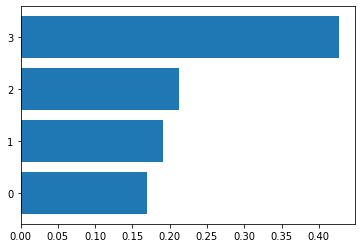

In [121]:
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])

ax.set_yticks(range(len(importances)))
#_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

We will split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, and 20% that we will hold back as a validation dataset.

You now have training data in the X_train and Y_train for preparing models and a X_validation and Y_validation sets that we can use later.

**5.2 Test Harness**

We will use stratified 10-fold cross validation to estimate model accuracy.

This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

Stratified means that each fold or split of the dataset will aim to have the same distribution of example by class as exist in the whole training dataset.

**5.3 Build Models**

We don’t know which algorithms would be good on this problem or what configurations to use.

We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s test 6 different algorithms:

1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

Let’s build and evaluate our models:

In [122]:
'''
...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
'''	

"\n\n# Spot Check Algorithms\nmodels = []\nmodels.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))\nmodels.append(('LDA', LinearDiscriminantAnalysis()))\nmodels.append(('KNN', KNeighborsClassifier()))\nmodels.append(('CART', DecisionTreeClassifier()))\nmodels.append(('NB', GaussianNB()))\nmodels.append(('SVM', SVC(gamma='auto')))\n# evaluate each model in turn\nresults = []\nnames = []\nfor name, model in models:\n\tkfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)\n\tcv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')\n\tresults.append(cv_results)\n\tnames.append(name)\n\tprint('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))\n"

**5.4 Select Best Model**

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

Running the example above, we get the following raw results:

We can see that it looks like Linear Discriminant Analysis (LDA) has the largest estimated accuracy score at about 77.59% and standard deviation of 0.028

We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

A useful way to compare the samples of results for each algorithm is to create a box and whisker plot for each distribution and compare the distributions.

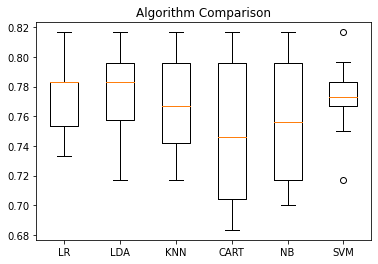

In [123]:
...
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

We can see that the box and whisker plots are squashed at the top of the range, with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies.

**5.5 Complete Example**

For reference, we can tie all of the previous elements together into a single script.

The complete example is listed below.

**6. Make Predictions**

We must choose an algorithm to use to make predictions.

The results in the previous section suggest that the SVM was perhaps the most accurate model. We will use this model as our final model.

Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.

**6.1 Make Predictions**

We can fit the model on the entire training dataset and make predictions on the validation dataset.

In [ ]:
...
# Make predictions on validation dataset
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

**6.2 Evaluate Predictions**

We can evaluate the predictions by comparing them to the expected results in the validation set, then calculate classification accuracy, as well as a confusion matrix and a classification report.

In [124]:
import joblib 
joblib.dump(rf_clf, 'model.pkl') 
model = joblib.load('model.pkl' ) 
model.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.])

We can see that the accuracy is 0.966 or about 96% on the hold out dataset.

The confusion matrix provides an indication of the errors made.

Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).